In [2]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
dt = constants.dt

0.005026548245743669


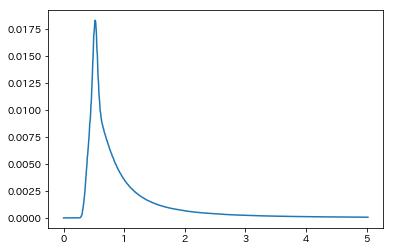

In [4]:
jj = ss.JONSWAP(1000,10,0.3)
x=np.arange(0,jj.N*jj.delta_omega,jj.delta_omega)
y=[]
for i in range(jj.N):
    y.append(jj.waves[i].amp)

plt.plot(x,y)
print(jj.delta_omega)

In [ ]:
ww = ss.JONSWAP(100,5,0.4)

Text(0.5,1,'Wave Profile at t=40[s]')

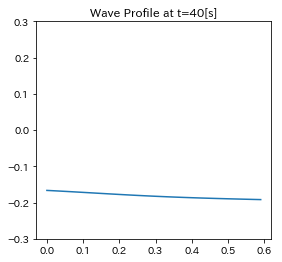

In [32]:
time = 40
xdata = np.arange(0,0.6,0.01)
ydata = np.array([ww.get(x,time) for x in xdata])
fig, ax = plt.subplots()
# ax.set_xlim(-4.0,4.0)
ax.set_ylim(-0.3,0.3)
ax.set_aspect('equal', adjustable='box')

ax.plot(xdata,ydata)
ax.set_title("Wave Profile at t=" + str(time) + "[s]")
# ax.scatter(pp.posx,pp.posz,s=10)
# t+=1  
# pp.update(en_thr=False)


In [24]:
pp = ship.Particle(0,0.18)
dt = 0.01
t=0
num = 5000
dl = []
xl = []
xvl = []
xal = []
zl = []
zvl= []
zal =[]
eng = []
pl = []


for i in range(num):
    pp.update(ww,t,20)
    dl.append(pp.draught)
    xl.append(pp.posx)
    xvl.append(pp.velx)
    xal.append(pp.accx)
    zl.append(pp.posz)
    zvl.append(pp.velz)
    zal.append(pp.accz)
    pl.append(pp.angle*(180/math.pi))
    eng.append(pp.mass*pp.velz**2)
    t+=dt

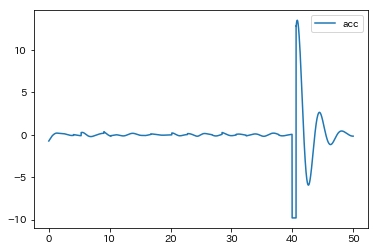

In [25]:
fig, ax = plt.subplots()
tdata = np.arange(0,num*dt,dt)
# ax.set_ylim(-0.5,0.5)
# ax.plot(tdata,xl,label="pos")
# ax.plot(tdata,zvl,label="vel")
ax.plot(tdata,zal,label="acc")
# ax.plot(tdata,dl,label="draught")
# ax.plot(tdata,eng,label="energy")
# ax.plot(tdata,pl,label="pitch angle")
# ax.plot(xl,zl)

# ax.plot(tdata,xvl,label="vel")

ax.legend()

Text(0.5,1,'xpos')

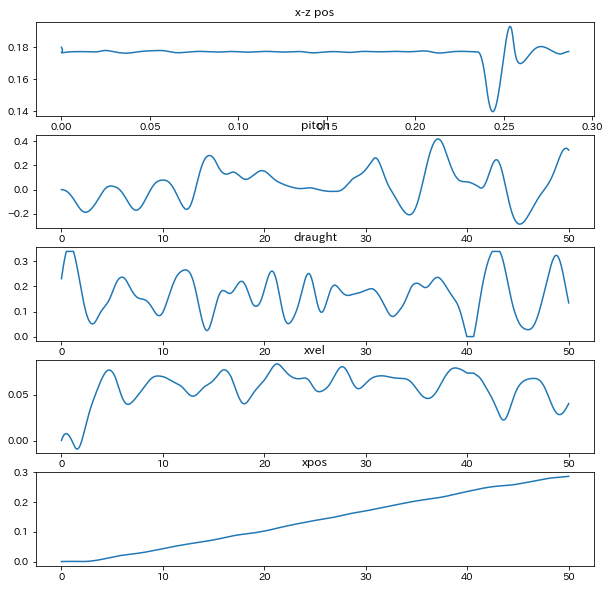

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5,figsize=(10,10))

ax1.plot(xl,zl)
ax1.set_title('x-z pos')

ax2.plot(tdata,pl)
ax2.set_title('pitch')

ax3.plot(tdata,dl)
ax3.set_title('draught')

ax4.plot(tdata,xvl)
ax4.set_title('xvel')

ax5.plot(tdata,xl)
ax5.set_title('xpos')
